In [40]:
import easyocr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import re

In [41]:
import re
def find_dates(text, pattern):
    return re.findall(pattern, text)
text = "The date is 09022023 and the other date is 12122024."
pattern = r"\b(0[1-9]|1[0-2])[-/](0[1-9]|[12]\d|3[01])[-/](19\d\d|20\d\d)\b"
dates = find_dates(text, pattern)
print("Dates found:", dates)

Dates found: []


In [42]:
def dist(p, q):
    if abs(p[1]-q[1])<5:
        return 0
    return ((p[0]-q[0])**2 + ((p[1]-q[1]))**2)**0.5


def dist_x(p, q):
    return ((p[0]-q[0])**2 + ((p[1]-q[1])*10)**2)**0.5

In [43]:
# this needs to run only once to load the model into memory
reader = easyocr.Reader(['th', 'en'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [80]:
filename = '/Work/ccc_read_calories-main/images/0b79500de4037b87b78cddd365abe686.jpg'
result = reader.readtext(filename)

In [81]:
points = []
for d in result:
    x, y = (d[0][0][0]+d[0][2][0])/2, (d[0][0][1]+d[0][2][1])/2
    points.append([[x, y], d,])
    print(d[1])
pairs = []
used_points = []
for n in range(len(points)):
    # print(points[n])
    short = 1000
    temp = []
    for i in range(len(points)-1):
        for j in range(i+1, len(points)):
            if i in used_points or j in used_points:
                continue
            if dist(points[i][0], points[j][0]) < short:
                short = dist(points[i][0], points[j][0])
                temp = [i, j]
    if temp != []:
        used_points.append(temp[0])
        used_points.append(temp[1])
        pairs.append([temp, short])
# print(pairs)
for p in pairs:
    print(points[p[0][0]][1][1], "=", points[p[0][1]][1][1], " width1=", points[p[0][0]][1][0][1][0]-points[p[0][0]][1][0][0][0], " height1=", points[p[0][0]][1][0][2][1] -
          points[p[0][0]][1][0][1][1], " width2=", points[p[0][1]][1][0][1][0]-points[p[0][1]][1][0][0][0], " height2=", points[p[0][1]][1][0][2][1]-points[p[0][1]][1][0][1][1])

ตรอ
เมืองจิพบรีaoad cycling
 kitsada nimnualrat
2d ส.ศี
3ร27น
pรสาา
uycling
69.43
2:11:19
.ส
761
เฝลา
183
มาบิบอเรามนาา
กาายแคเศบสไม.
2d ส.ศี = 3ร27น  width1= 30  height1= 14  width2= 34  height2= 14
pรสาา = uycling  width1= 22  height1= 8  width2= 34  height2= 14
2:11:19 = .ส  width1= 52  height1= 16  width2= 36  height2= 6
มาบิบอเรามนาา = กาายแคเศบสไม.  width1= 72  height1= 8  width2= 65  height2= 14
761 = เฝลา  width1= 32  height1= 20  width2= 22  height2= 8
เมืองจิพบรีaoad cycling =  kitsada nimnualrat  width1= 112  height1= 14  width2= 116  height2= 14
69.43 = 183  width1= 46  height1= 20  width2= 24  height2= 14


In [87]:
points = []
for d in result:
    x, y = (d[0][0][0]+d[0][2][0])/2, (d[0][0][1]+d[0][2][1])/2
    points.append([[x, y], d,])
p1 = {}
for n in range(len(points)):
    if ("ม.ค." in points[n][1][1]
        or " มกราคม" in points[n][1][1]
        or "ก.พ." in points[n][1][1]
        or " กุมภาพันธ์" in points[n][1][1]
        or "มี.ค." in points[n][1][1]
        or " มีนาคม" in points[n][1][1]
        or "เม.ย." in points[n][1][1]
        or " เมษายน" in points[n][1][1]
        or "พ.ค." in points[n][1][1]
        or " พฤษภาคม" in points[n][1][1]
        or "มิ.ย." in points[n][1][1]
        or " มิถุนายน" in points[n][1][1]
        or "ก.ค." in points[n][1][1]
        or " กรกฎาคม" in points[n][1][1]   
        or "ส.ค." in points[n][1][1]
        or " สิงหาคม" in points[n][1][1]
        or "ก.ย." in points[n][1][1]
        or " กันยายน" in points[n][1][1]
        or "ต.ค." in points[n][1][1]
        or " ตุลาคม" in points[n][1][1]
        or "พ.ย." in points[n][1][1]
        or " พฤศจิกายน" in points[n][1][1]
        or "ธ.ค." in points[n][1][1]
        or " ธันวาคม" in points[n][1][1]
        or " 2023" in points[n][1][1]
        or "/2023" in points[n][1][1]
        or " 2566" in points[n][1][1]
        or "/2566" in points[n][1][1]
        or " 2024" in points[n][1][1]
        or "/2024" in points[n][1][1]
        or " 2567" in points[n][1][1]
        or "/2567" in points[n][1][1]
        or " 2025" in points[n][1][1]
        or "/2025" in points[n][1][1]
        or " 2568" in points[n][1][1]
        or "/2568" in points[n][1][1]
        or "today" in points[n][1][1]):
        p1["date"] = [points[n]]
    if (
        "duration" in points[n][1][1]
        or "เวลารวม" == points[n][1][1]
        or "เวลา" == points[n][1][1]
        or "เาลา" == points[n][1][1]
        or "เวสา" == points[n][1][1]
        or " เวลา" == points[n][1][1]
        or "ระยะเวลา" == points[n][1][1]
        or "ระบะเวลา" == points[n][1][1]
        or "ระยะเาลา" == points[n][1][1]
        or " เวลาใช้งาน" == points[n][1][1]
        or "เวลาใช้งาน" == points[n][1][1]
        or " time" == points[n][1][1]
        or "workout time" == points[n][1][1]
        or "active time" in points[n][1][1]
        or "ระยะเวลาออก" in points[n][1][1]
        or "เวลาออก" in points[n][1][1]
        or "moving time" in points[n][1][1]
        or "running" in points[n][1][1]
        or "รามทั้งหมด" in points[n][1][1]
        or "ระยะเวล1ฮอกก้าลัง" in points[n][1][1]
        or "ระยะเวลา1ออกกำลังกาย" in points[n][1][1]
        or "total time" in points[n][1][1]
        or "ระยะเวลาออกกำลัง" in points[n][1][1]
        or "ระยะเวลาออกกำลังกาย" in points[n][1][1]
        or "กามอาเจลา" in points[n][1][1]
        or "เวลาราม" == points[n][1][1]
    ) \
            and not (":" in points[n][1][1]):
        p1["tm"] = [points[n]]
    if (
        "แคลอรี" == points[n][1][1]
        or "แคลอรี่ทั้งหมด" == points[n][1][1]
        or "แคลอรี่" == points[n][1][1]
        or "แคณารี" == points[n][1][1]
        or "กิโลแคล" == points[n][1][1]
        or "กิโลแคลอรี" == points[n][1][1]
        or "ศิโลแคล" == points[n][1][1]
        or "calories" in points[n][1][1]
        or "calorigs" in points[n][1][1]
        or "cal" == points[n][1][1]
        or " cal" == points[n][1][1]
        or "kcal" == points[n][1][1]
        or "พลังงานทั้งหมด" in points[n][1][1]
        or "พลังงานฮอกกำลังกาย" in points[n][1][1]
        or "พลังงานออกกำลัง" in points[n][1][1]
        or "การเผาผลาญ" in points[n][1][1]
        or "การเยาผสาเ" in points[n][1][1]
        or "เคลอรี่" == points[n][1][1]
        or "กิโลแคลอรี ทั้งหมด" == points[n][1][1]
        or "กิโฮนคลอรีทังหมค" == points[n][1][1]
        or "แคลอร์" == points[n][1][1]
        or "แคล" == points[n][1][1]
        or "พลังงานที่ใช้ไป" in points[n][1][1]
        or "กีโลแคล" in points[n][1][1]
        or "แคลอรี่ทังหมด" == points[n][1][1]
        or "พลังงานออก" in points[n][1][1]
        or "แคลอรี่รวม" in points[n][1][1] 
    ):
        p1["cal"] = [points[n]]
    if (
        "distance" in points[n][1][1]
        or "ระยะทาง" in points[n][1][1]
        or "ระปะทาง" == points[n][1][1]
        or "ระยะทางทั้งหมด" == points[n][1][1]
        or "กม." == points[n][1][1]
        or " กม." == points[n][1][1]
        or "กม" == points[n][1][1]
        or " กม" == points[n][1][1]
        or "m" == points[n][1][1]
        or " m" == points[n][1][1]
        or "km" == points[n][1][1]
        or " km" == points[n][1][1]
        or "distance(km)" == points[n][1][1]
        or "กิโลเมตร" == points[n][1][1]
        or " กิโลเมตร" == points[n][1][1]
        or "ระยะทาง(กม.)" == points[n][1][1]
        or "ระยะภางจ" == points[n][1][1]
        or "mi" == points[n][1][1]
    ) \
            and not (":" in points[n][1][1] or any(char.isdigit() for char in points[n][1][1])):
        p1["dis"] = [points[n]]
if 'tm' in p1.keys():
    short = 1000
    for i in range(len(points)):
        if points[i] != p1["tm"][0] and ("นาที" in points[i][1][1] or ":" in points[i][1][1] or "'" in points[i][1][1]) and any(char.isdigit() for char in points[i][1][1]):
            if dist(points[i][0], p1["tm"][0][0]) < short:
                short = dist(points[i][0], p1["tm"][0][0])
                if len(p1["tm"]) == 1:
                    p1["tm"].append(points[i])
                else:
                    p1["tm"][1] = points[i]
else:
    for i in range(len(points)):
        if ":" in points[i][1][1]:
            p1["tm"] = [points[i]]
            p1["tm"].append(points[i])
if 'cal' in p1.keys():
    short = 1000
    for i in range(len(points)):
        if points[i] != p1["cal"][0] and points[i][1][1][0].isdigit() and any(char.isdigit() for char in points[i][1][1]):
            if dist(points[i][0], p1["cal"][0][0]) < short:
                short = dist(points[i][0], p1["cal"][0][0])
                if len(p1["cal"]) == 1:
                    p1["cal"].append(points[i])
                else:
                    p1["cal"][1] = points[i]
else:
    for i in range(len(points)):
        if " kcal" in points[i][1][1]:
            p1["cal"] = [points[i]]
            p1["cal"].append(points[i])
if 'dis' in p1.keys():
    short = 1000
    for i in range(len(points)):
        if points[i] != p1["dis"][0] and points[i][1][1][0].isdigit() and any(char.isdigit() for char in points[i][1][1]) and "'" not in points[i][1][1] and ":" not in points[i][1][1]:
            if dist(points[i][0], p1["dis"][0][0]) < short:
                
                short = dist(points[i][0], p1["dis"][0][0])
                if len(p1["dis"]) == 1:
                    p1["dis"].append(points[i])
                else:
                    p1["dis"][1] = points[i]
else:
    for i in range(len(points)):
        if (" km" in points[i][1][1] or "กม." in points[i][1][1] or " กม." in points[i][1][1] or "km" in points[i][1][1] or " m" in points[i][1][1] or "m" in points[i][1][1]) and not "km/h" in points[i][1][1] and not " h" in points[i][1][1] and not "meetea" in points[i][1][1]:
            p1["dis"] = [points[i]]
            p1["dis"].append(points[i])
            
if 'tm' in p1.keys():
    print(p1["tm"][0][1][1]+" (เวลา)", "=", p1["tm"][1][1][1])
if 'cal' in p1.keys():
    print(p1["cal"][0][1][1]+" (แคลอรี)", "=", p1["cal"][1][1][1])
if 'dis' in p1.keys():
    print(p1["dis"][0][1][1]+" (ระยะทาง)", "=", p1["dis"][1][1][1])
if 'date' in p1.keys():
    print("วันที่", "=", p1["date"][0][1][1])

2:11:19 (เวลา) = 2:11:19
 kitsada nimnualrat (ระยะทาง) =  kitsada nimnualrat


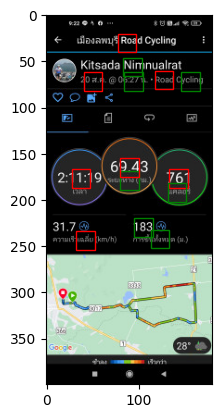

In [74]:
im = np.array(Image.open(filename), dtype=np.uint8)
# plt.imshow(im)
fig, ax = plt.subplots(1)
ax.imshow(im)
for p in pairs:
    rect = patches.Rectangle((points[p[0][0]][0][0]-10, points[p[0][0]][0][1]-10), 20, 20, linewidth=1,
                             edgecolor='r', facecolor="none")
    ax.add_patch(rect)
    rect = patches.Rectangle((points[p[0][1]][0][0]-10, points[p[0][1]][0][1]-10), 20, 20, linewidth=1,
                             edgecolor='g', facecolor="none")
    ax.add_patch(rect)
plt.show()

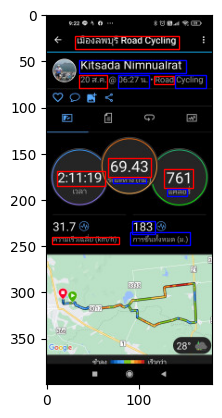

In [75]:
im = np.array(Image.open(filename), dtype=np.uint8)
# plt.imshow(im)
fig, ax = plt.subplots(1)
ax.imshow(im)
for p in pairs:
    rect = patches.Rectangle((points[p[0][0]][1][0][0][0], points[p[0][0]][1][0][0][1]), points[p[0][0]][1][0][1][0]-points[p[0][0]][1][0][0][0],
                             points[p[0][0]][1][0][2][1]-points[p[0][0]][1][0][1][1], linewidth=1,
                             edgecolor='r', facecolor="none")
    ax.add_patch(rect)
    rect = patches.Rectangle((points[p[0][1]][1][0][0][0], points[p[0][1]][1][0][0][1]), points[p[0][1]][1][0][1][0]-points[p[0][1]][1][0][0][0],
                             points[p[0][1]][1][0][2][1]-points[p[0][1]][1][0][1][1], linewidth=1,
                             edgecolor='b', facecolor="none")
    ax.add_patch(rect)
plt.show()